In [59]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier #Import KNN
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for metric evaluations
from sklearn import model_selection
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt #so you can draw
import numpy as np

In [60]:
import pandas as pd
from io import StringIO

col_names = ['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post',
             'elo2_post', 'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 
             'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post',
             'qbelo2_post', 'score1', 'score2', 'quality', 'importance', 'total_rating']

# load dataset
data = pd.read_csv("nfl_elo.csv", header=None, names=col_names)
data = data.drop(0)

In [61]:
# Loop through rows and replace NaN values in 'playoff' with 'r', signifying "Regular Season"
for index, row in data.iterrows():
    if pd.isna(row['playoff']):
        data.at[index, 'playoff'] = 'r'        

# Dropping last 3 columns        
data = data.drop(['quality', 'importance', 'total_rating'], axis=1)

In [62]:
#change categorical values to numeric values

# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
l1 = le.fit_transform(data['team1'])

data.drop("team1", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
# with column name 'Purchased'
data["team1"] = l1

#repeat for the rest of the categorical values
l2 = le.fit_transform(data['team2'])
data.drop("team2", axis=1, inplace=True)
data["team2"] = l2

l3 = le.fit_transform(data['qb1'])
data.drop("qb1", axis=1, inplace=True)
data["qb1"] = l3

l4 = le.fit_transform(data['qb2'])
data.drop("qb2", axis=1, inplace=True)
data["qb2"] = l4

#change categorical values to numeric values

# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
l1 = le.fit_transform(data['team1'])

data.drop("team1", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
# with column name 'Purchased'
data["team1"] = l1

#repeat for the rest of the categorical values
l2 = le.fit_transform(data['team2'])
data.drop("team2", axis=1, inplace=True)
data["team2"] = l2

l3 = le.fit_transform(data['qb1'])
data.drop("qb1", axis=1, inplace=True)
data["qb1"] = l3

l4 = le.fit_transform(data['qb2'])
data.drop("qb2", axis=1, inplace=True)
data["qb2"] = l4

l5 = le.fit_transform(data['playoff'])  
data.drop("playoff", axis=1, inplace=True)
data["playoff"] = l5

In [63]:
# Function to add column for win/loss result. 0 means team1 lost, 1 means team1 won. -1 indicates a tie.
def compare_scores(score1, score2):
    if score1 < score2:
        return 0
    elif score1 > score2:
        return 1
    else:
        return -1  # Return a special value indicating that the scores are equal

data['outcome'] = data.apply(lambda row: compare_scores(float(row['score1']), float(row['score2'])), axis=1)

# Remove rows where the scores are equal
data = data[data['outcome'] != -1]

In [64]:
# Split dataset in features and target variable
feature_cols = ['qbelo1_pre', 'qbelo2_pre', 'qb1_adj', 'qb2_adj']
X = data[feature_cols] # Features
y = data.outcome # Target variable 

In [65]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


# Create Decision Tree classifer object
oneTree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
oneTree.fit(X_train,y_train)
y_pred = oneTree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.6425569564255695


In [66]:
#K-fold Cross-Validation
'''
In k-fold cross-validation, the data is divided into k folds. 
The model is trained on k-1 folds with one fold held back for testing. 
This process gets repeated to ensure each fold of the dataset gets the
chance to be the held back set. Once the process is completed, 
we can summarize the evaluation metric using the mean or/and the standard deviation.
'''
kfold = model_selection.KFold(n_splits=10)
model_kfold = DecisionTreeClassifier(criterion="entropy", max_depth=3)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print(f"Accuracy: {results_kfold.mean()} ({results_kfold.std()})")

Accuracy: 0.6417142753912464 (0.01625291810445927)


In [67]:
#Stratified K-fold Cross-Validation
'''
Stratified K-Fold approach is a variation of k-fold cross-validation 
that returns stratified folds, i.e., each set containing approximately
the same ratio of target labels as the complete data.
'''
skfold = StratifiedKFold(n_splits=10)
model_skfold = DecisionTreeClassifier(criterion="entropy", max_depth=3)
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print(f"Accuracy: {results_skfold.mean()} ({results_skfold.std()})")

Accuracy: 0.6425775773261743 (0.016116233470768786)


In [68]:
#Repeated Random Test-Train Splits
'''
This technique is a hybrid of traditional train-test splitting and the k-fold 
cross-validation method. In this technique, we create random splits of the data 
in the training-test set manner and then repeat the process of splitting and 
evaluating the algorithm multiple times, just like the cross-validation method.
'''
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.20, random_state=100)
model_shufflecv = DecisionTreeClassifier(criterion="entropy", max_depth=3)
results_shufflecv = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print(f"Accuracy: {results_shufflecv.mean()} ({results_shufflecv.std()})")

Accuracy: 0.6420703384207033 (0.005761606836459182)


In [69]:
def lookAtModels(models):
    results=[]
    names=[]
    for name, model in models:
        skfold = StratifiedKFold(n_splits=10)
        cv_results= cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
    return names, results#not sure why I want lists yet

In [70]:
#make all your models
models =[]
for d in range(2,15):
    models.append((f'Tree depth {d}',DecisionTreeClassifier(criterion="entropy",max_depth=d)))

In [71]:
#see your results
names,results = lookAtModels(models)

Tree depth 2: 0.6428715702761766 (0.008744115515721788)
Tree depth 3: 0.6410695432430731 (0.0070235180700778015)
Tree depth 4: 0.6441992140075722 (0.01328421977821475)
Tree depth 5: 0.6402181713535435 (0.011129469815643537)
Tree depth 6: 0.6409749363741828 (0.00934103504655079)
Tree depth 7: 0.6420186695684237 (0.010043330478163465)
Tree depth 8: 0.6367089040171947 (0.0070881739625640785)
Tree depth 9: 0.6292194034011709 (0.006023419583719813)
Tree depth 10: 0.6259952156982653 (0.009377754202655027)
Tree depth 11: 0.6212530913603785 (0.009854737349959699)
Tree depth 12: 0.6210657661627562 (0.010123951543181678)
Tree depth 13: 0.615944494905438 (0.015194794189784217)
Tree depth 14: 0.6098787737079238 (0.012925808258721864)


In [72]:
D2_mean = np.mean(results[0])
D2_std= np.std(results[0])
D3_mean = np.mean(results[1])
D3_std = np.std(results[1])
D4_mean = np.mean(results[2])
D4_std = np.std(results[2])
D5_mean = np.mean(results[3])
D5_std = np.std(results[3])
D6_mean = np.mean(results[4])
D6_std = np.std(results[4])
D7_mean = np.mean(results[5])
D7_std = np.std(results[5])
D8_mean = np.mean(results[6])
D8_std = np.std(results[6])
D9_mean = np.mean(results[7])
D9_std = np.std(results[7])
D10_mean = np.mean(results[8])
D10_std = np.std(results[8])
D11_mean = np.mean(results[9])
D11_std = np.std(results[9])
D12_mean = np.mean(results[10])
D12_std = np.std(results[10])
D13_mean = np.mean(results[11])
D13_std = np.std(results[11])
D14_mean = np.mean(results[12])
D14_std = np.std(results[12])

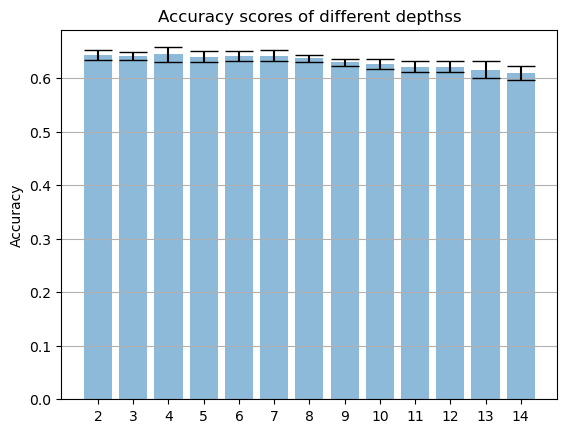

In [73]:
#lists for plot – I bet there is a better way to do this
depth =['2','3','4','5','6','7','8', '9', '10', '11', '12', '13', '14']
x_pos = np.arange(len(depth))
#print(x_pos)
Means = [D2_mean,D3_mean,D4_mean,D5_mean,D6_mean,D7_mean,D8_mean,D9_mean,D10_mean,D11_mean,D12_mean,D13_mean,D14_mean]
error = [D2_std,D3_std,D4_std,D5_std,D6_std,D7_std,D8_std,D9_std,D10_std,D11_std,D12_std,D13_std,D14_std]
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(depth)
ax.set_title('Accuracy scores of different depthss')
ax.yaxis.grid(True)

In [49]:
#Fix data for KNN
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class or Outcome
# use the .drop() method to gather all features except Target Class/outcome
# axis -> argument refers to columns; a 0 would represent rows a 1 is column
scaler.fit(data[feature_cols])
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(data[feature_cols])
#Here we have the normalized dataset, minus the target/output column which is the last col
data_feat = pd.DataFrame(scaled_features, columns= feature_cols)
#split dataset in features and target variable
X = data_feat
y = data['outcome'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [50]:
#To help with model selection
models =[]
models.append(('KNN', KNeighborsClassifier(n_neighbors=9, metric='euclidean')))
models.append(('Tree',DecisionTreeClassifier(criterion="entropy", max_depth=3)))

In [51]:
#verify your results
KNN_mean = np.mean(results[0])
KNN_std= np.std(results[0])
DT_mean = np.mean(results[1])
DT_std = np.std(results[1])
print(f'KNN mean: {KNN_mean} ({KNN_std})\nTree mean: {DT_mean} ({DT_std})')

KNN mean: 0.6428715702761766 (0.008744115515721788)
Tree mean: 0.6401223953883648 (0.008800534744208013)


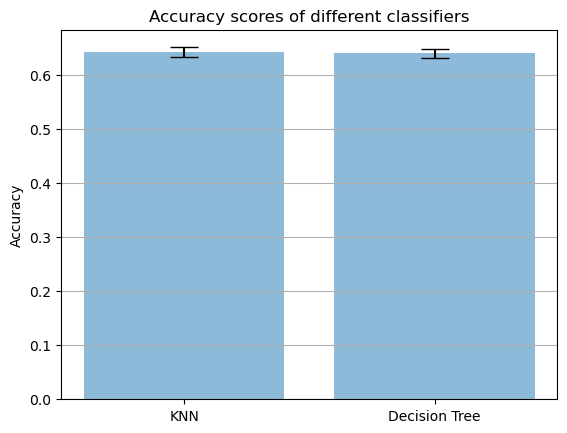

In [52]:
#lists for plot
classifiers =['KNN', 'Decision Tree']
x_pos = np.arange(len(classifiers))
#print(x_pos)
Means = [KNN_mean, DT_mean]
error = [KNN_std, DT_std]
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(classifiers)
ax.set_title('Accuracy scores of different classifiers')
ax.yaxis.grid(True)

In [53]:
def lookAtModels(models):
    results=[]
    names=[]
    for name, model in models:
        skfold = StratifiedKFold(n_splits=10)
        cv_results= cross_val_score(model, X_train, y_train, cv=skfold, scoring='f1')
        results.append(cv_results)
        names.append(name)
        print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
    return names, results#if you wish to graph later

In [54]:
names,results = lookAtModels(models)

KNN: 0.686093707656209 (0.00813691940238997)
Tree: 0.6934628360227957 (0.012105597188196239)
